[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/visdesignlab/intent-system-data-notebook/blob/master/Data%20Generation%20Notebook.ipynb)

Some required packages

In [1]:
# !pip3 install altair

Import all the packages we will be using.

In [2]:
import pandas as pd
import altair as alt
alt.renderers.enable('notebook')

import numpy as np
import random
from IPython.display import display
from random import randint
from random import uniform
from sklearn.cluster import KMeans

import requests
import json

from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_regression
from sklearn.datasets import make_classification 
import pprint

In [3]:
# Plot properties
# def my_theme(*args, **kwargs):
#     return {'width': 500, 'height': 500}
  
# alt.themes.register('custom-size', my_theme)
# alt.themes.enable('custom-size')

# Data Generation

In [4]:
# Helper function

def print_ground(data, col, val):
  print("Ground Truth:", data.index[data[col] == val].tolist())

## Cluster

Number of clusters: 3 and 4. mix the centroids

### Generation

In [5]:
def createCluster(centerNum, samples, stdDev, useSeed, seedStart, outliers, clusterCenters=None, useCategories=False):
  cluster_dataset = None

  # for i in range(seedStart, seedStart + 3):

  if clusterCenters == None:
      x,y = make_blobs(n_samples=samples+outliers, n_features=2, centers=centerNum, cluster_std=stdDev, random_state = seedStart if useSeed else None)
  else:
      x,y = make_blobs(n_samples=samples+outliers, n_features=2, centers=clusterCenters, cluster_std=stdDev, random_state = seedStart if useSeed else None)

  y = y.reshape((samples+outliers,1))
  data = pd.DataFrame(np.hstack((x,y)), columns=["X", "Y", "Cluster"])

  if outliers > 0:
    maxX = data["X"].max()
    minX = data["X"].min()
      
    maxY = data["Y"].max()
    minY = data["Y"].min()

    for i in range(0, outliers):
      while(True):
        xVal = random.uniform(minX, maxX)
        yVal = random.uniform(minY, maxY)
        
        # You could also change the numbers inside of this line to be bigger/smaller than 1 if you want the outliers to be further/closer to the clusters
        if(data.loc[(data["X"] - 1 < xVal) & (data["X"] + 1 > xVal) & (data["Y"] - 1 < yVal) & (data["Y"] + 1 > yVal)].shape[0] == 0):
          data.loc[samples+i, ("X")] = xVal
          data.loc[samples+i, ("Y")] = yVal
          data.loc[samples+i, ("Cluster")] = centerNum
          break

  shiftX = 0
  shiftY = 0

  if data["X"].min() < 0:
    shiftX = abs(data["X"].min())
    data["X"] += shiftX
    # for j in range(0, len(clusterCenters)):
    #   clusterCenters[j][0] += shiftX


  if data["Y"].min() < 0:
    shiftY = abs(data["Y"].min())
    data["Y"] += shiftY
    # for j in range(0, len(clusterCenters)):
    #   clusterCenters[j][1] += shiftY

  if useCategories:    
    subject_map = {
      0: "Circle",
      1: "Cross",
      2: "Diamond",
      3: "Square"
    }

    data['Cluster'] = data['Cluster'].map(subject_map)

  return data, clusterCenters

### Easy

In [6]:
centerNum = 3
samples = 200
stdDev = 1
useSeed = True
seedStart = 8
outliers = 0

cluster_dataset_easy1, centers = createCluster(centerNum, samples, stdDev, useSeed, seedStart, outliers, [[2.65, 2.1], [15.4, 21.23], [15.33, 12.31]])

cet = alt.Chart(cluster_dataset_easy1).mark_point().encode(
    x="X:Q",
    y="Y:Q",
    color="Cluster:N"
).properties(
    title='Easy Training'
)

cluster_easy_training_1 = cluster_dataset_easy1
data = cluster_dataset_easy1


In [7]:
centerNum = 4
samples = 200
stdDev = 1
useSeed = True
seedStart = 8
outliers = 0

centers = [[6.3, 10.4], [15.31, 21.74], [2.33, 2.47], [14.99, 12.98]]

# cluster_dataset_easy2, centers = createCluster(centerNum, samples, stdDev, useSeed, seedStart, outliers)
cluster_dataset_easy2, centers = createCluster(centerNum, samples, stdDev, useSeed, seedStart, outliers, centers)

data = cluster_dataset_easy2
cluster_easy_task_1 = cluster_dataset_easy2

ce1 = alt.Chart(cluster_dataset_easy2).mark_point().encode(
    x="X:Q",
    y="Y:Q",
    color="Cluster:N"
).properties(
    title='Easy 1'
)

In [8]:
centerNum = 4
samples = 200
stdDev = 1
useSeed = True
seedStart = 10
outliers = 0


centers =[[1.895, 16.845], [13.25, 2.13], [10.59, 16.65], [7.72, 6.2]]

cluster_dataset_easy3, centers = createCluster(centerNum, samples, stdDev, useSeed, seedStart, outliers, centers)



data = cluster_dataset_easy3

cluster_easy_task_2 = cluster_dataset_easy3

ce2 = alt.Chart(cluster_dataset_easy3).mark_point().encode(
    x="X:Q",
    y="Y:Q",
    color="Cluster:N"
).properties(
    title='Easy 2'
)

In [9]:
ce = alt.hconcat(*[cet, ce1,ce2]).resolve_scale(color='independent')

### Medium

In [10]:
centerNum = 3
samples = 200
stdDev = 2.1
useSeed = True
seedStart = 8
outliers = 0

centers = [[18.16, 14.28], [5.56, 4.41], [18.31, 23.41]]

cluster_dataset_med1, centers = createCluster(centerNum, samples, stdDev, useSeed, seedStart, outliers, centers)


cluster_med_training_1 = cluster_dataset_med1


cmt = alt.Chart(cluster_dataset_med1).mark_point().encode(
    x="X:Q",
    y="Y:Q",
    color="Cluster:N"
).properties(
    title='Medium Training'
)

In [11]:
centerNum = 3
samples = 200
stdDev = 1.6
useSeed = True
seedStart = 20
outliers = 0

centers = [[14.38, 7.78], [3.33, 4.12], [20.68, 6.34]]


cluster_dataset_med2, centers = createCluster(centerNum, samples, stdDev, useSeed, seedStart, outliers, centers)




cluster_med_task_1 = cluster_dataset_med2

cm1 = alt.Chart(cluster_dataset_med2).mark_point().encode(
    x="X:Q",
    y="Y:Q",
    color="Cluster:N"
).properties(
    title='Medium 1'
)


In [12]:
centerNum = 4
samples = 200
stdDev = 1.6
useSeed = True
seedStart = 21
outliers = 0

cluster_dataset_med3, centers = createCluster(centerNum, samples, stdDev, useSeed, seedStart, outliers, [[17.68, 3.55], [4.58, 9.19], [9.63, 16.69], [8.06, 3.67]])

cluster_med_task_2=cluster_dataset_med3

cm2 = alt.Chart(cluster_dataset_med3).mark_point().encode(
    x="X:Q",
    y="Y:Q",
    color="Cluster:N"
).properties(
    title='Medium 2'
)


In [13]:
cm = alt.hconcat(*[cmt, cm1,cm2]).resolve_scale(color='independent')

### Hard

In [14]:
centerNum = 3
samples = 200
stdDev = 3.8
useSeed = True
seedStart = 8
outliers = 0

cluster_dataset_hard1, centers = createCluster(centerNum, samples, stdDev, useSeed, seedStart, outliers, [[23.04, 27.87], [10, 7.86], [22.2, 17.51]])

cluster_hard_training_1 = cluster_dataset_hard1

cht = alt.Chart(cluster_dataset_hard1).mark_point().encode(
    x="X:Q",
    y="Y:Q",
    color="Cluster:N"
).properties(
    title="Hard Training"
)

In [15]:
centerNum = 3
samples = 200
stdDev = 2.8
useSeed = True
seedStart = 17
outliers = 0

cluster_dataset_hard2, centers = createCluster(centerNum, samples, stdDev, useSeed, seedStart, outliers, [[6.55, 5.62], [17.86, 17.34], [8.48, 15.22]])

cluster_hard_task_1 = cluster_dataset_hard2

ch1 = alt.Chart(cluster_dataset_hard2).mark_point().encode(
    x="X:Q",
    y="Y:Q",
    color="Cluster:N"
).properties(
    title="Hard 1"
)

In [16]:
centerNum = 4
samples = 200
stdDev = 1.8
useSeed = True
seedStart = 20
outliers = 0

# cluster_dataset_hard3, centers = createCluster(centerNum, samples, stdDev, useSeed, seedStart, outliers)
cluster_dataset_hard3, centers = createCluster(centerNum, samples, stdDev, useSeed, seedStart, outliers, [[4.33, 6.6], [15.71, 10.56], [11.68, 3.18], [22.25, 8.7]])

cluster_hard_task_2 = cluster_dataset_hard3

ch2 = alt.Chart(cluster_dataset_hard3).mark_point().encode(
    x="X:Q",
    y="Y:Q",
    color="Cluster:N"
).properties(
    title="Hard 2"
)

In [ ]:
ch = alt.hconcat(*[cht, ch1,ch2]).resolve_scale(color='independent')

## Cluster datasets

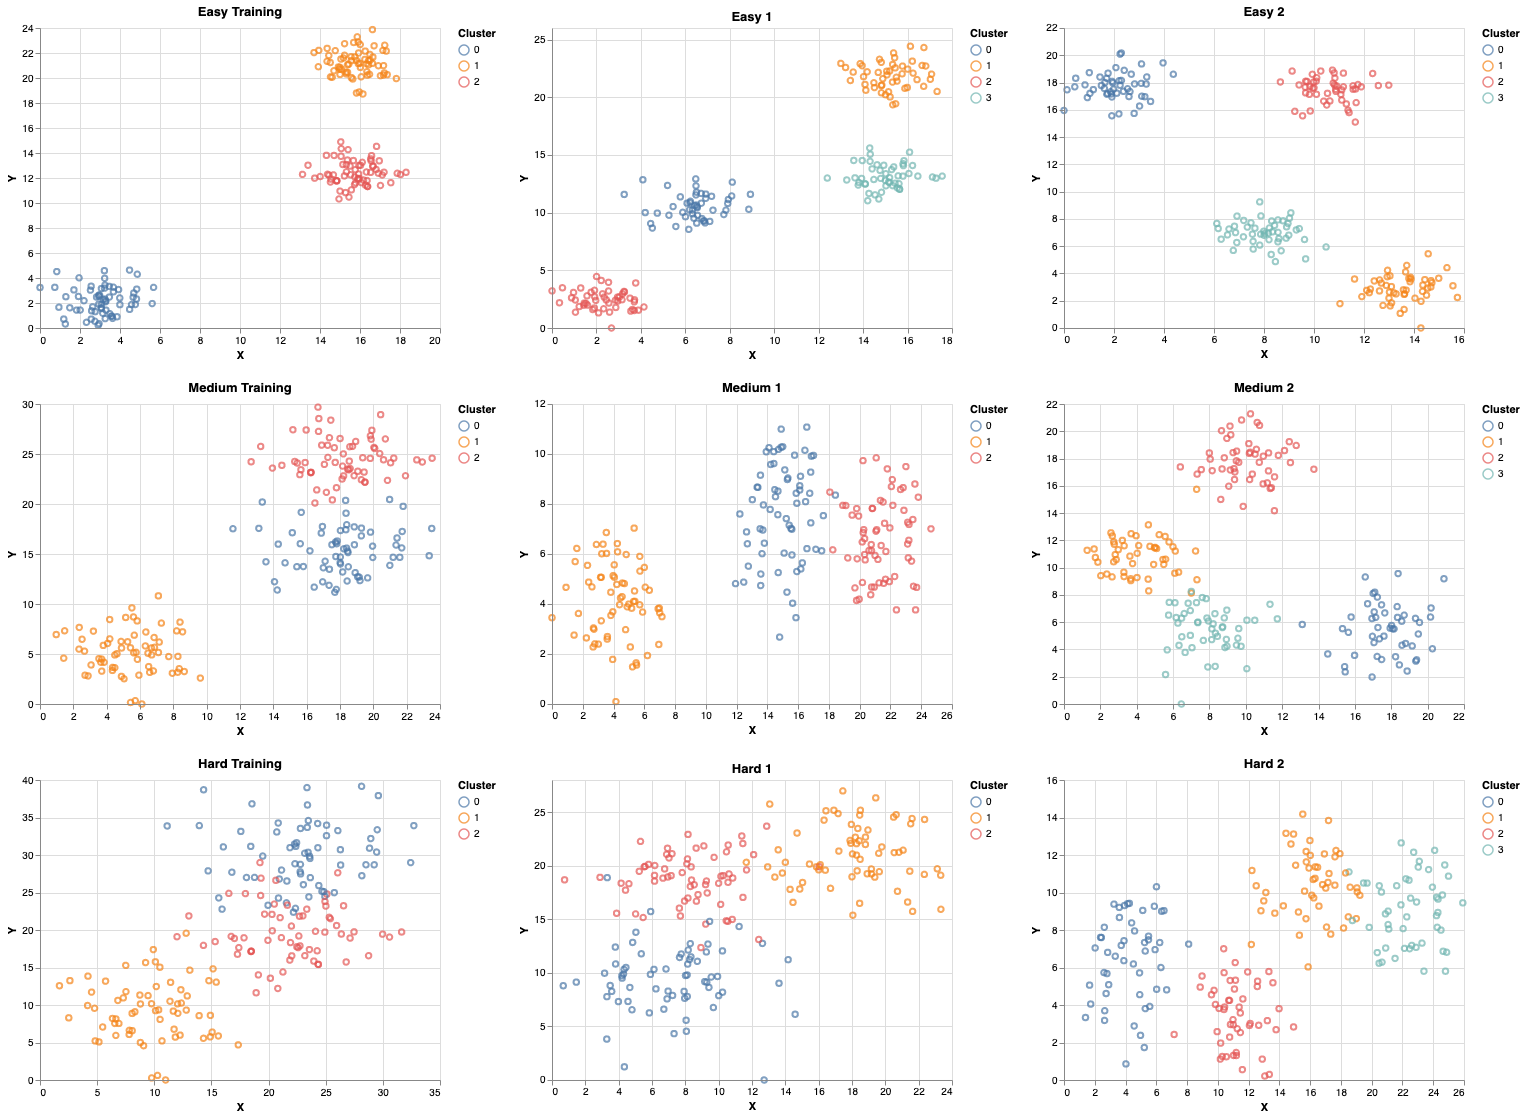

In [18]:
alt.vconcat(*[ce, cm, ch])